In [1]:
# Startup Profit Prediction using Multiple Linear Regression
# Author: Manikandaprabhu.S  
# Objective: Predict startup profit based on R&D, Administration, Marketing Spend, and State.

In [2]:
## 1. Importing Required Libraries
import pandas as pd

In [3]:
## 2. Loading the Dataset
dataset = pd.read_csv("50_Startups.csv")
a=pd.options.display.max_rows=10
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [4]:
## 3. Handling Categorical Variables (State Encoding)
data = pd.get_dummies(dataset,dtype=int)
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
...,...,...,...,...,...,...,...
45,1000.23,124153.04,1903.93,64926.08,0,0,1
46,1315.46,115816.21,297114.46,49490.75,0,1,0
47,0.00,135426.92,0.00,42559.73,1,0,0
48,542.05,51743.15,0.00,35673.41,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     int64  
 5   State_Florida     50 non-null     int64  
 6   State_New York    50 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 2.9 KB


In [6]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [7]:
## 4. Preparing Features and Target Variable
Features = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
Target = data[['Profit']]
Features

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
...,...,...,...,...,...,...
45,1000.23,124153.04,1903.93,0,0,1
46,1315.46,115816.21,297114.46,0,1,0
47,0.00,135426.92,0.00,1,0,0
48,542.05,51743.15,0.00,0,0,1


In [8]:
## 5. Splitting Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Features,Target,test_size=1/3,random_state=0)
x_train

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1
15,114523.61,122616.84,261776.23,0,0,1
30,61994.48,115641.28,91131.24,0,1,0
...,...,...,...,...,...,...
46,1315.46,115816.21,297114.46,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
0,165349.20,136897.80,471784.10,0,0,1
47,0.00,135426.92,0.00,1,0,0


In [9]:
## 6. Training the Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
## 7. Making Predictions
y_pred = model.predict(x_test)


In [11]:
## 8. Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2
r2 = r2_score(y_test, y_pred)

# Number of observations
n = len(y_test)

# Number of independent variables
p = x_test.shape[1]

# Calculate Adjusted R2
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R2 Score:", r2)
print("Adjusted R2:", adjusted_r2)
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8752655285748308
Adjusted R2: 0.8004248457197292
MSE: 118348525.66956936


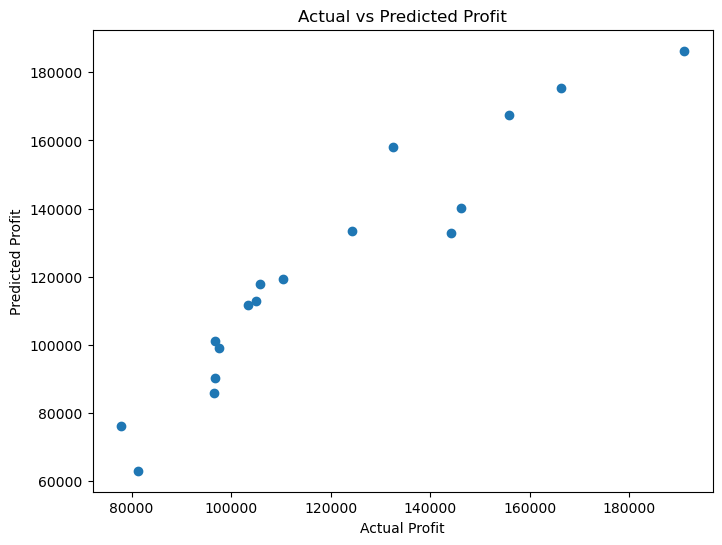

In [12]:
## 9. Visualizing Model Performance (Actual vs Predicted)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()

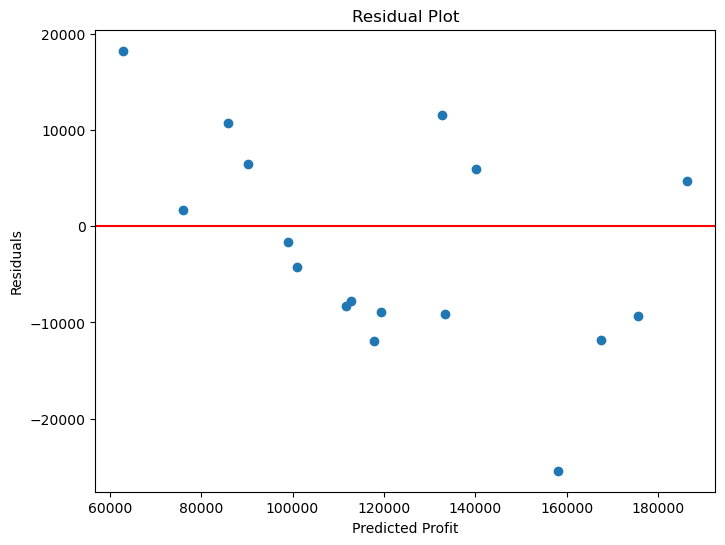

In [13]:
## 10. Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r')
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [14]:
# 9. Saving the Trained Model
import pickle
filename = "Finalized_model.sav"
regressor = pickle.dump(model,open(filename,'wb'))

In [15]:
## Conclusion:

# The Multiple Linear Regression model successfully predicts startup profit based on investment and spending factors.
# The R² score indicates how well the independent variables explain profit variation.
# The Multiple Linear Regression model explains approximately 87% of the variance in startup profit.
# R&D Spend shows the strongest positive impact on profit compared to other variables.